# Homework 02


## Part 1 - Questions

### Question 1: 

Has the death rate gone down since the initial combat against the coronavirus?

* Who (population): US tested individuals
* What (subject, discipline): COVID-19 Death ratio as time passed
* Where (location): US
* When (snapshot, longitudinal): The past year
* How much data do you need to do the analysis/work: daily deaths, daily cases, and respective dates

### Question 2: 

Does higher daily cases correlate to higher death rates?

* Who (population): US tested individuals
* What (subject, discipline): COVID-19 daily cases vs death ratio
* Where (location): US
* When (snapshot, longitudinal): The past year
* How much data do you need to do the analysis/work: daily deaths, daily cases

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

CDC, Google, worldometers.info

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: National History
2. Link to Data: 
    * [Data Download](https://covidtracking.com/data/download)
    * [License](https://covidtracking.com/about-data/license)
3. Source / Origin: 
	* Author or Creator: Artis Curiskis, Rachel Glickhouse, Alice Goldfarb, Julia Kodysh, Zach Lipton, Dave Luo, Jessica Malaty-Rivera, Michal Mart, Theo Michel, Kevin Miller, Kara Oehler, Brandon Park, Kara Schechtman
	* Publication Date: 3/7/2021
	* Publisher: The COVID Tracking Project
	* Version or Data Accessed: TODO
4. License: Creative Commons CC BY 4.0
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format




### Overview

* Format: CSV
* Size: 42 KB
* Number of Records: 421



### Sample of Data




In [161]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
def get_cases():
    with open('.././data/raw/national-history.csv', 'r') as dataset:
        next(dataset)
        for line in dataset:
            separate = line.split(',')
            yield(separate[0], separate[12])
cases = list(get_cases())
cases[:10]

[('"2021-03-07"', '28756489'),
 ('"2021-03-06"', '28714654'),
 ('"2021-03-05"', '28654639'),
 ('"2021-03-04"', '28585852'),
 ('"2021-03-03"', '28520365'),
 ('"2021-03-02"', '28453529'),
 ('"2021-03-01"', '28399281'),
 ('"2021-02-28"', '28351189'),
 ('"2021-02-27"', '28296840'),
 ('"2021-02-26"', '28225595')]


### Fields or Column Headers

* Field/Column 1: date (Integer Array)
* Field/Column 2: death (Integer)
* Field/Column 3: deathIncrease (Integer)
* Field/Column 4: inIcuCumulative (Integer)
* Field/Column 5: inIcuCurrently (Integer)
* Field/Column 6: hospitalizedIncrease (Integer)
* Field/Column 7: hospitalizedCumulative (Integer)
* Field/Column 8: hospitalizedCurrently (Integer)
* Field/Column 9: negative (Integer)
* Field/Column 10: negativeIncrease (Integer)
* Field/Column 11: onVentilatorCumulative (Integer)
* Field/Column 12: onVentilatorCurrently (Integer)
* Field/Column 13: positive (Integer)
* Field/Column 14: positiveIncrease (Integer)
* Field/Column 15: states (Integer)
* Field/Column 16: totalTestResults (Integer)
* Field/Column 17: totalTestResultsIncrease (Integer)

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform
* Columns extracting: date, deathIncrease, positiveIncrease
* date: convert to a single integer that is readable by custom method
* deathIncrease, positiveIncrease


In [182]:
#Store data in double array
with open('.././data/raw/national-history.csv', 'r') as dataset: 
    cleandata = []
    next(dataset)
    counter = 0
    for line in dataset:
        cleandata.append(line.split(','))
        #Stop at line 342 as that is when there are incomplete data
        counter+= 1
        if counter == 342:
            break
#Date, Positive case increase, death increase array
date = []
posInc = []
deaInc = []
for i in range(len(cleandata)):
    date.append(cleandata[i][0])
    posInc.append(int(cleandata[i][13]))
    deaInc.append(int(cleandata[i][2]))

#On average, it is about a 12 day delay for the daily death graph to be proportional to daily case graph
#So, a death ratio (daily death/daily case) with a 12 day delay
deaRat = []
for i in range(len(cleandata)):
    if i+12 < len(cleandata):
        deaRat.append(deaInc[i]/posInc[i+12])

deacase = []
for i in range(len(cleandata)):
    if i+12 < len(cleandata):
        deacase.append(deaRat[i]/posInc[i+12])

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [163]:
import numpy as np
print("Mean: ", np.mean(deaRat))
print("Median: ", np.median(deaRat))

Mean:  0.02390738680641765
Median:  0.019131734389038098


#### Dispersion

In [164]:
def variance(data):
    mu = np.mean(data)
    return sum((x-mu) ** 2 for x in data) / len(data)
print("Variance: ",variance(deaRat))
print("Standard deviation: ", variance(deaRat)**.5, "\n")

Variance:  0.0002875610787635449
Standard deviation:  0.01695762597663791 



#### Outliers


In [176]:
# TODO: copy and paste your results here
def q1(d):
    qq1 = len(d) // 4
    return d[qq1]
def q3(d):
    qq3 = 3 * len(d) // 4
    return d[qq3]
    
temp1 = deaRat
temp1.sort()
temp1q1 = q1(temp1)
temp1q3 = q3(temp1)
IQRrange = temp1q3 - temp1q1
outlier1 = []
for i in range(len(temp1)):
    if temp1[i] < temp1q1 - 1.5 * IQRrange:
        if temp1[i] > temp1q3 + 1.5 * IQRrange:
            outlier1.append(temp1[i])
print(outlier1)
print("So no outliers\n")

[]
So no outliers



#### Other


In [166]:
# N/A

###  Analysis on Categorical Data

#### Frequency

In [167]:
#N/A

#### Unique Values

In [168]:
# N/A

## Part 5 - Visualizations



Text(0, 0.5, 'Death rate')

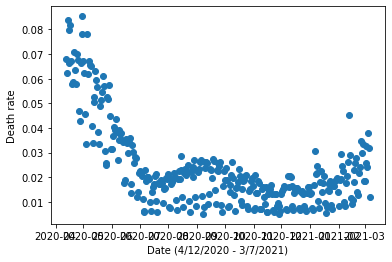

In [181]:
# TODO: add visualizations here
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

#Death rate as time passes plot
dattime = []
for i in range(len(date)):
    if i+12 < len(date):
        date[i] = date[i].replace('"','')
        dattime.append(datetime.strptime(date[i], "%Y-%m-%d"))
dates = matplotlib.dates.date2num(dattime)
matplotlib.pyplot.plot_date(dates,deaRat)
plt.xlabel('Date (4/12/2020 - 3/7/2021)')
plt.ylabel('Death rate')
#Death rate vs high positive cases

This is the death rate of COVID positive patients from 4/12/2020 to 3/7/2021.

<class 'list'>


Text(0, 0.5, 'Death Rate')

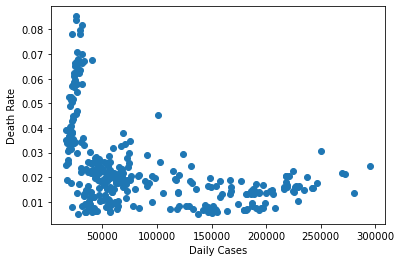

In [180]:
print(type([posInc]))
temp = []
for i in range(len(posInc)):
    if i + 12 < len(posInc):
        temp.append(posInc[i])
plt.scatter(temp,deaRat)
plt.xlabel('Daily Cases')
plt.ylabel('Death Rate')

This is the death rate of COVID patients compared to the number of daily cases


## Part 6 - Conclusion

### Calculations

My questions were not particularly answered by any of the central tendencies for any of the statistics except for the trend, as my question was based on time trend and correlations, which do not use those statistics. Although irrelevant, I found out that the death rate is skewed towards the higher rate. There were no outliers, which is good since it  would be worrying for our immune system to be so inconsistent throughout the year. 

### Graph

For the time vs death rate graph, it seems that there was a huge influx of death until about August last year as hospitals struggled to find medical capacity to assist all COVID patients. Then, the death rate began steadily fluctuating, which seems to signal that it is at a stabilized point. This means that COVID-19 has a kill rate of about 2% under normal conditions.

For the daily cases vs death rate graph, I was surprised that the trend was inversely proportional. The fact that the death rate was at the highest when we had the lowest cases and death rate was lowest when we had the highest seems unintuitive to me. Perhaps it is because I put a delay for the death rate to catch up to the hospitalization rates. This one needs further testing

### Overall

My questions were clearly answered, although there is some chance that the second graph had some incorrect calcualtions along the way

## In Case the Graph Does Not Look Very Good

There seems to be an issue with the graphs where running all the cells at once gives a totally different graph. I need to run Part 3 Extract/Transform Cell once more to get the correct graph. So in case the graph looks strange, I have the picture of what it is supposed to look like.

Graph 1:

![Graph 1](.././data/raw/graph1.png)

Graph 2:
![Graph 2](.././data/raw/graph2.png)